In [241]:
#import libraries 
import pandas as pd
import thinkstats2
import thinkplot
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

In [180]:
#load datset
df = pd.read_csv('dataset.csv')
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Variables and Their Descriptive Models

In [183]:
#create function to calculate descriptive statistics
def calculate_statistics(column):
    print(f"\nDescriptive Statistics for '{column}':")
    print("Mean:", df[column].mean())
    print("Mode:", df[column].mode()[0])
    print("Standard Deviation (Spread):", df[column].std())
    print("Range:", df[column].max() - df[column].min())
    print("Skewness:", skew(df[column]))
    print("Kurtosis:", kurtosis(df[column]))

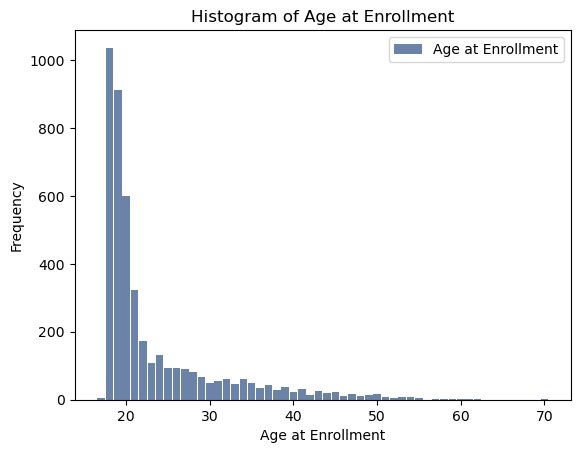

<Figure size 800x600 with 0 Axes>

In [185]:
#grab variable information from dataset
age_at_enrollment = df['Age at enrollment']
#create histogram
hist = thinkstats2.Hist(age_at_enrollment, label='Age at Enrollment')
#plot
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Age at Enrollment', ylabel='Frequency', title = 'Histogram of Age at Enrollment')
thinkplot.Show()

In [187]:
#calculate statistics
calculate_statistics('Age at enrollment')


Descriptive Statistics for 'Age at enrollment':
Mean: 23.265144665461122
Mode: 18
Standard Deviation (Spread): 7.587815615029819
Range: 53
Skewness: 2.0542915401023834
Kurtosis: 4.120873165187086


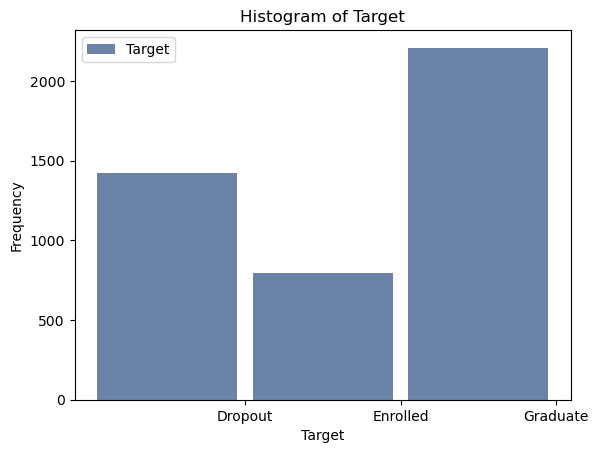

<Figure size 800x600 with 0 Axes>

In [189]:
target = df['Target']
hist2 = thinkstats2.Hist(target, label='Target')
thinkplot.Hist(hist2)
thinkplot.Config(xlabel='Target', ylabel='Frequency', title = 'Histogram of Target')
thinkplot.Show()

In [191]:
df['Target'] = df['Target'].map({'Dropout': 0, 'Enrolled': 1, 'Graduate': 2})
calculate_statistics('Target')


Descriptive Statistics for 'Target':
Mean: 1.178119349005425
Mode: 2
Standard Deviation (Spread): 0.8882433505671717
Range: 2
Skewness: -0.3554733056576326
Kurtosis: -1.6390389064041855


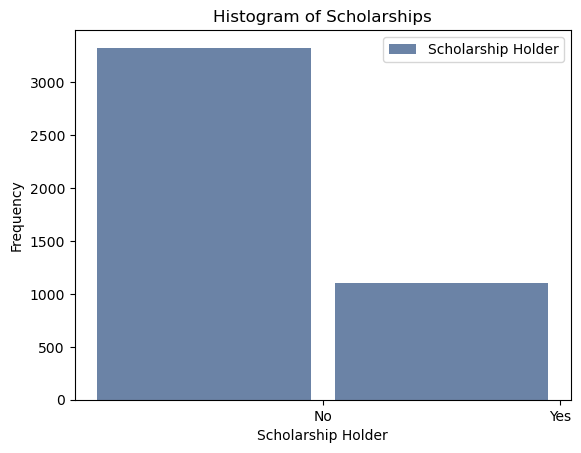

<Figure size 800x600 with 0 Axes>

In [193]:
scholarship_labels = {1: 'Yes', 0: 'No'}
df['Scholarship holder'] = df['Scholarship holder'].map(scholarship_labels)
hist5 = thinkstats2.Hist(df['Scholarship holder'], label='Scholarship Holder')
thinkplot.Hist(hist5)
thinkplot.Config(xlabel='Scholarship Holder', ylabel='Frequency', title = 'Histogram of Scholarships')
thinkplot.Show()

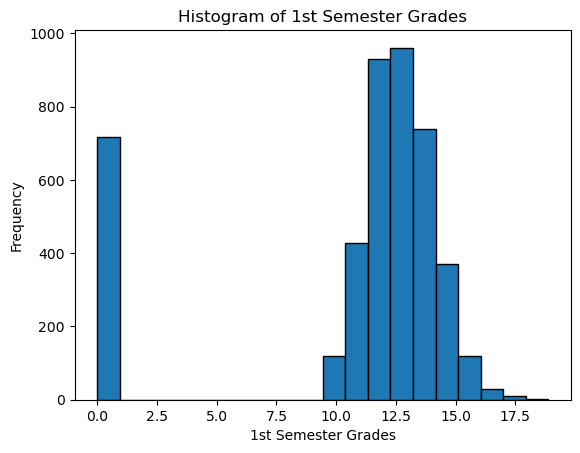

In [197]:
#plot 1st semester grades using matplotlib (thinkstats didn't work?)
plt.hist(df['Curricular units 1st sem (grade)'], bins=20, edgecolor='black')
plt.xlabel('1st Semester Grades')
plt.ylabel('Frequency')
plt.title('Histogram of 1st Semester Grades')
plt.show()

In [199]:
calculate_statistics('Curricular units 1st sem (grade)')


Descriptive Statistics for 'Curricular units 1st sem (grade)':
Mean: 10.640821575154185
Mode: 0.0
Standard Deviation (Spread): 4.843663380663773
Range: 18.875
Skewness: -1.5676138493937792
Kurtosis: 0.9060786812265382


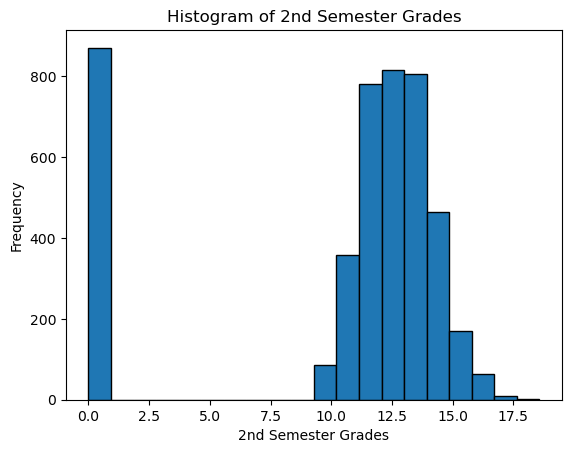

In [201]:
plt.hist(df['Curricular units 2nd sem (grade)'], bins=20, edgecolor='black')
plt.xlabel('2nd Semester Grades')
plt.ylabel('Frequency')
plt.title('Histogram of 2nd Semester Grades')
plt.show()

In [203]:
calculate_statistics('Curricular units 2nd sem (grade)')


Descriptive Statistics for 'Curricular units 2nd sem (grade)':
Mean: 10.230205722716985
Mode: 0.0
Standard Deviation (Spread): 5.210807954644242
Range: 18.571428571428573
Skewness: -1.313204720541968
Kurtosis: 0.0651362085766074


## PMF of Age at Enrollment: Younger Students vs. Older Students

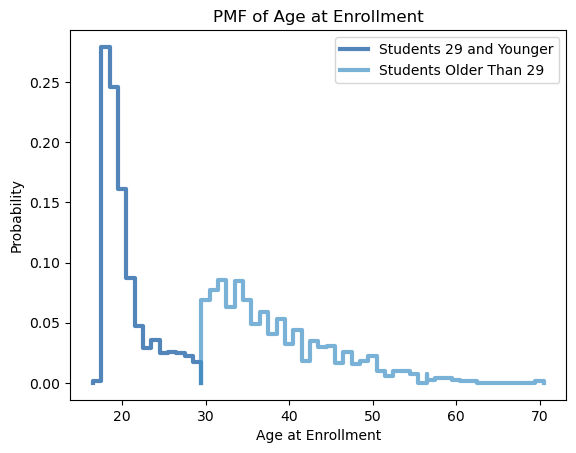

<Figure size 800x600 with 0 Axes>

In [225]:
#define variable and scenarios
variable = 'Age at enrollment'
younger = df[df[variable] <= 29][variable]
older = df[df[variable] > 29][variable]
#create PMFs
pmf_younger = thinkstats2.Pmf(younger, label='Students 29 and Younger')
pmf_older = thinkstats2.Pmf(older, label='Students Older Than 29')
#plot
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf_younger, pmf_older])
thinkplot.Config(xlabel='Age at Enrollment', ylabel='Probability', title='PMF of Age at Enrollment')
thinkplot.Show()

## CDF for Curricular Units 1st Semester

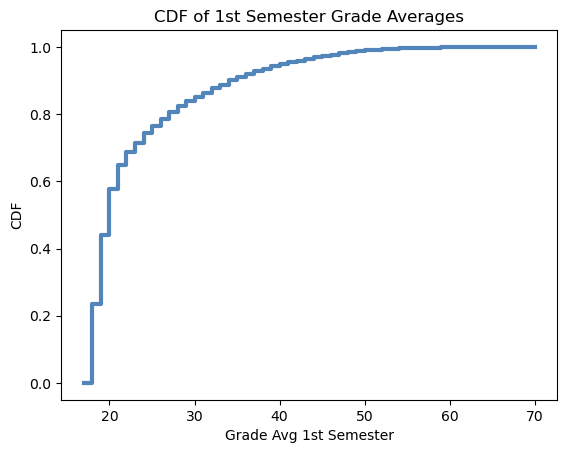

<Figure size 800x600 with 0 Axes>

In [275]:
variable2 = 'Curricular units 1st sem (grade)'
grades = df[variable]
#get CDF
cdf_grades = thinkstats2.Cdf(grades, label='Grade Avg 1st Semester')
#plot
thinkplot.PrePlot(1)
thinkplot.Cdf(cdf_grades)
thinkplot.Config(xlabel='Grade Avg 1st Semester', ylabel='CDF', title='CDF of 1st Semester Grade Averages')
thinkplot.Show()

## Plot Normal Distribution of 2nd Semester Grade Averages

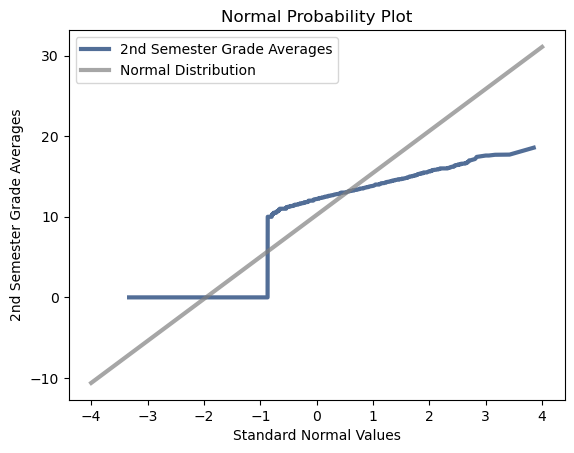

<Figure size 800x600 with 0 Axes>

In [281]:
#get variable, clean data
variable3 = 'Curricular units 2nd sem (grade)'
grades2 = df[variable3].dropna()
#compute quantiles and data values
xs, ys = thinkstats2.NormalProbability(grades2)
#plot
thinkplot.Plot(xs, ys, label='2nd Semester Grade Averages')
#get mean and standard deviation
mean = grades2.mean()
std = grades2.std()
#plot line for normal distribution
thinkplot.Plot([-4,4], [mean - 4 * std, mean + 4 * std], color='gray', label='Normal Distribution')
thinkplot.Config(xlabel='Standard Normal Values', ylabel='2nd Semester Grade Averages', title='Normal Probability Plot',
                 legend=True)
#show plot
thinkplot.Show()

## Scatter Plots

0.8371697405958248
21.129661677527018


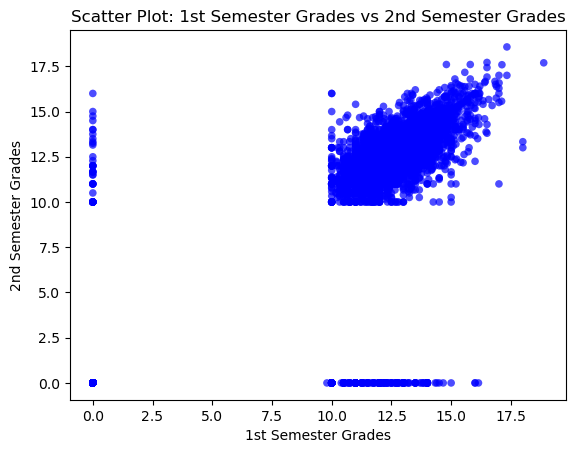

<Figure size 800x600 with 0 Axes>

In [277]:
from scipy.stats import pearsonr
#define variables
x_var1 = 'Curricular units 1st sem (grade)'
y_var1 = 'Curricular units 2nd sem (grade)'
#drop missing variables
df_clean = df[[x_var1, y_var1]].dropna()
#create  scatterplot
thinkplot.Scatter(df_clean[x_var1], df_clean[y_var1], alpha=0.7, color='blue')
thinkplot.Config(xlabel='1st Semester Grades', ylabel='2nd Semester Grades', 
                 title='Scatter Plot: 1st Semester Grades vs 2nd Semester Grades', legend=False)
#get correlation and covariance
corr, _= pearsonr(df_clean[x_var1], df_clean[y_var1])
covariance = df_clean[x_var1].cov(df_clean[y_var1])
print(corr)
print(covariance)
#show plot
thinkplot.Show()

-0.15661584876292112
-5.75607482444951


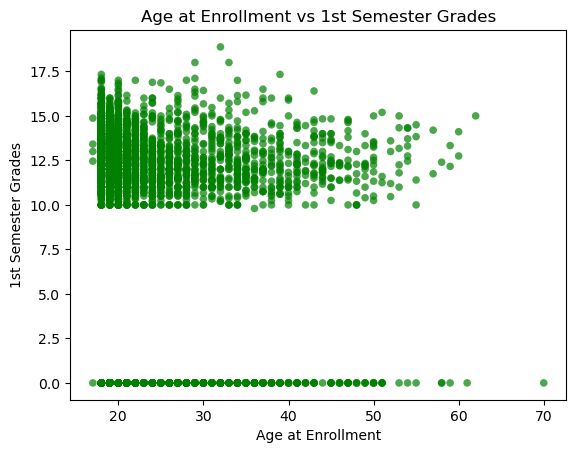

<Figure size 800x600 with 0 Axes>

In [285]:
#get variables
x_var2 = 'Age at enrollment'
y_var2 = 'Curricular units 1st sem (grade)'
# drop missing data
df_clean = df[[x_var2, y_var2]].dropna()
#plot
thinkplot.Scatter(df_clean[x_var2], df_clean[y_var2], alpha=0.7, color='green')
thinkplot.Config(xlabel='Age at Enrollment', ylabel='1st Semester Grades',
                 title='Age at Enrollment vs 1st Semester Grades', legend=False)
#get correlation and covariance
corr, _= pearsonr(df_clean[x_var2], df_clean[y_var2])
covariance = df_clean[x_var2].cov(df_clean[y_var2])
print(corr)
print(covariance)
#show plot
thinkplot.Show()

## Hypothesis Test

In [302]:
import scipy.stats as stats
target_var = 'Target'
observed_counts = df[target_var].value_counts().sort_index()
expected_proportions = [0.3, 0.5, 0.2]
expected_counts = [prop * len(df) for prop in expected_proportions]
chi2_stat, p_value = stats.chisquare(f_obs=observed_counts, f_exp=expected_counts)
print(chi2_stat)
print(p_value)

2897.446729957805
0.0


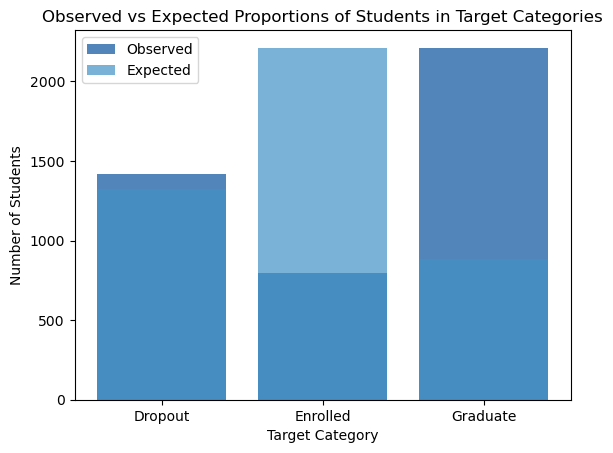

<Figure size 800x600 with 0 Axes>

In [319]:
#data frame for visualization
proportions_df = pd.DataFrame({
    'Category': observed_counts.index,
    'Observed': observed_counts.values,
    'Expected': expected_counts })
#plot
thinkplot.PrePlot(2) 
thinkplot.Bar(proportions_df['Category'], proportions_df['Observed'], label='Observed', alpha=0.7)
thinkplot.Bar(proportions_df['Category'], proportions_df['Expected'], label='Expected', alpha=0.7)
thinkplot.Config(
    xlabel='Target Category',
    ylabel='Number of Students',
    title='Observed vs Expected Proportions of Students in Target Categories',
    legend=True
)
thinkplot.Show()

## Regression Analysis

In [317]:
import statsmodels.api as sm
#define variables
dependent_var = 'Curricular units 2nd sem (grade)'
explanatory_var = 'Scholarship holder'
#add constant to variables
x = sm.add_constant(df[explanatory_var])
y = df[dependent_var]
#fit model
model = sm.OLS(y, x).fit()
print(model.summary())

                                   OLS Regression Results                                   
Dep. Variable:     Curricular units 2nd sem (grade)   R-squared:                       0.033
Model:                                          OLS   Adj. R-squared:                  0.033
Method:                               Least Squares   F-statistic:                     150.2
Date:                              Sun, 02 Mar 2025   Prob (F-statistic):           5.64e-34
Time:                                      13:48:03   Log-Likelihood:                -13506.
No. Observations:                              4424   AIC:                         2.702e+04
Df Residuals:                                  4422   BIC:                         2.703e+04
Df Model:                                         1                                         
Covariance Type:                          nonrobust                                         
                         coef    std err          t      P>|t|      [0